In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random
import seaborn as sns

In [2]:
Train_path = "C:\\Users\\jk113\\Desktop\\Machine Learning\\CNN Data\\Cats vs Dogs\\Train"
classes =['Dog','Cat']

Image_Dimension= 200
Training_Data = []

#defines the 2 paths for your preprocessing, cat and dog
for category in classes:
    path = os.path.join(Train_path,category)
    class_num = classes.index(category)
    
    for img in os.listdir(path):
        try:
            train_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            resize_train_array = cv2.resize(train_array,(Image_Dimension,Image_Dimension))
            Training_Data.append([resize_train_array,class_num])
        except Exception as e:
            pass

In [3]:
len(Training_Data)

24936

In [4]:
random.shuffle(Training_Data)

In [5]:
X=[]
y=[]

In [6]:
for features,label in Training_Data:
    X.append(features)
    y.append(label)

In [7]:
X=np.array(X)
X =X.reshape(-1,Image_Dimension,Image_Dimension,1)
X.shape

(24936, 200, 200, 1)

In [8]:
y=np.array(y).reshape(-1,1)

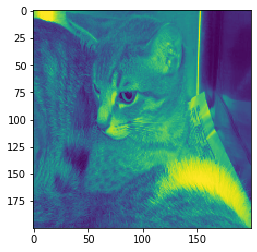

[[1]]


In [9]:
plt.imshow(np.array(X[1510:1511]).reshape(Image_Dimension,Image_Dimension))
plt.show()
print (y[1510:1511])

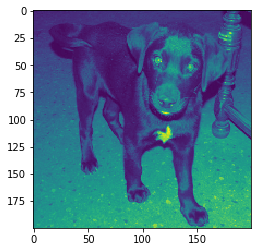

[[0]]


In [46]:
plt.imshow(np.array(X[100:101]).reshape(Image_Dimension,Image_Dimension))
plt.show()
print (y[100:101])

In [11]:
print(X.shape,y.shape)

(24936, 200, 200, 1) (24936, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation,Dropout
from sklearn.model_selection import train_test_split
X=X/255
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=30,test_size=0.2)

Using TensorFlow backend.


In [13]:
X_train.shape

(19948, 200, 200, 1)

In [14]:
y_train.shape

(19948, 1)

In [15]:
from keras import optimizers
from keras.layers import Dropout

learn_rate=[0.001]
training_log_db=[]

optimizer = optimizers.RMSprop(lr=learn_rate)
model=Sequential()

model.add(Conv2D(45,kernel_size=3,activation='relu',input_shape=(Image_Dimension,Image_Dimension,1),padding='same'))
model.add(MaxPool2D(2))

model.add(Conv2D(45,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))

model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))

model.add(Conv2D(64,kernel_size=5,activation='relu',padding='same'))
model.add(MaxPool2D(2))

model.add(Dropout(0.5))

model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

training_history = model.fit(X_train,y_train,validation_split=0.2,epochs=7,batch_size=30)
training_log = pd.DataFrame.from_dict(training_history.history)
training_log=training_log[['loss','acc','val_loss','val_acc']]
training_log_db.append(training_log)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15958 samples, validate on 3990 samples
Epoch 1/7
15958/15958 [==============================] - 86s 5ms/step - loss: 0.6619 - acc: 0.6070 - val_loss: 0.5766 - val_acc: 0.7118
Epoch 2/7
15958/15958 [==============================] - 43s 3ms/step - loss: 0.5336 - acc: 0.7360 - val_loss: 0.5300 - val_acc: 0.7353
Epoch 3/7
15958/15958 [==============================] - 43s 3ms/step - loss: 0.4412 - acc: 0.7951 - val_loss: 0.3955 - val_acc: 0.8248
Epoch 4/7
15958/15958 [==============================] - 43s 3ms/step - loss: 0.3789 - acc: 0.8312 - val_loss: 0.3709 - val_acc: 0.8519
Epoch 5/7
15958/15958 [==============================] - 43s 3ms/step - loss: 0.3343 - acc: 0.8552 - val_loss: 0.3061 - val_acc: 0.8727
Epoch 6/7
15958/15958 [==============================] 

In [23]:
#training_log_db= pd.concat(training_log_db,axis=1)
training_log_db.loc[training_log_db['val_acc']==training_log_db['val_acc'].max()]
#model.save('Cats_vs_Dogs_V1.h5')

,loss,acc,val_loss,val_acc
6,0.264411,0.889021,0.260071,0.889975


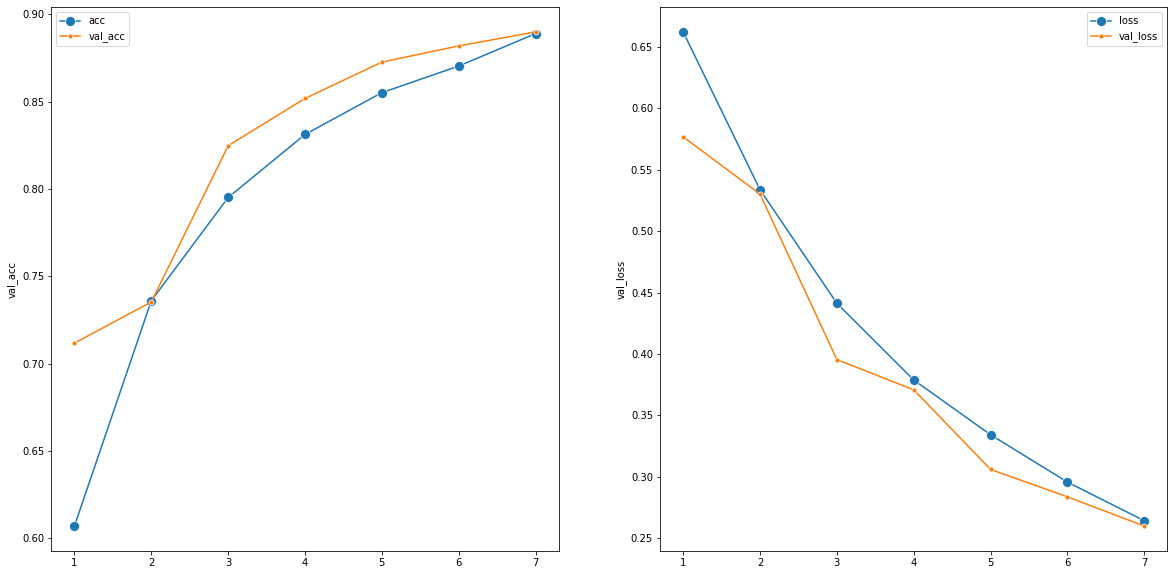

In [24]:
f,axes=plt.subplots(1,2,figsize=(20,10))
axes=axes.flatten()
_=sns.lineplot(y='acc',x=np.arange(1,len(training_log)+1) ,data=training_log_db,ax=axes[0],markers=True,ms=10,marker='o',label='acc')
_=sns.lineplot(y='val_acc',x=np.arange(1,len(training_log)+1) ,data=training_log_db,ax=axes[0],markers=True,ms=10,marker='.',label='val_acc')
_=sns.lineplot(y='loss',x=np.arange(1,len(training_log)+1) ,data=training_log_db,ax=axes[1],markers=True,ms=10,marker='o',label='loss')
_=sns.lineplot(y='val_loss',x=np.arange(1,len(training_log)+1) ,data=training_log_db,ax=axes[1],markers=True,ms=10,marker='.',label='val_loss')

In [33]:
test_prediction = model.predict(X_test)
test_prediction = pd.DataFrame(test_prediction,columns=['predictions'])
test_prediction.loc[test_prediction['predictions']<=0.5,'Prediction_Class']=0
test_prediction.loc[test_prediction['predictions']>0.5,'Prediction_Class']=1
test_prediction

,predictions,Prediction_Class
0,0.993061,1.0
1,0.980966,1.0
2,0.597232,1.0
3,0.991992,1.0
4,0.003023,0.0
...,...,...
4983,0.306976,0.0
4984,0.539743,1.0
4985,0.996745,1.0
4986,0.604670,1.0


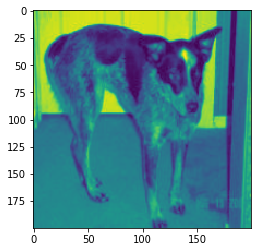

[[0]]


In [43]:
plt.imshow(np.array(X_test[4983:4984]).reshape(Image_Dimension,Image_Dimension))
plt.show()
print (y_test[4983:4984])

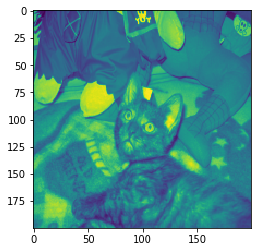

[[1]]


In [44]:
plt.imshow(np.array(X_test[4984:4985]).reshape(Image_Dimension,Image_Dimension))
plt.show()
print (y_test[4984:4985])

In [37]:
from sklearn.metrics import classification_report
print (classification_report(y_test,test_prediction['Prediction_Class']))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      2493
           1       0.86      0.93      0.89      2495

    accuracy                           0.89      4988
   macro avg       0.89      0.89      0.89      4988
weighted avg       0.89      0.89      0.89      4988



(2.0, 0.0)

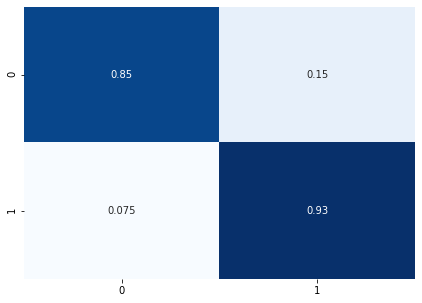

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix_array= confusion_matrix(y_test,test_prediction['Prediction_Class'])
confusion_matrix_array_total = np.sum(confusion_matrix_array,axis=1)
confusion_matrix_array_normalized = confusion_matrix_array/confusion_matrix_array_total[:,None]
confusion_matrix_array_normalized = pd.DataFrame(confusion_matrix_array_normalized)

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix_array_normalized,annot=True,cmap='Blues',cbar=False)
b,t = plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)